# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.16.2


## Creating data to view and fit

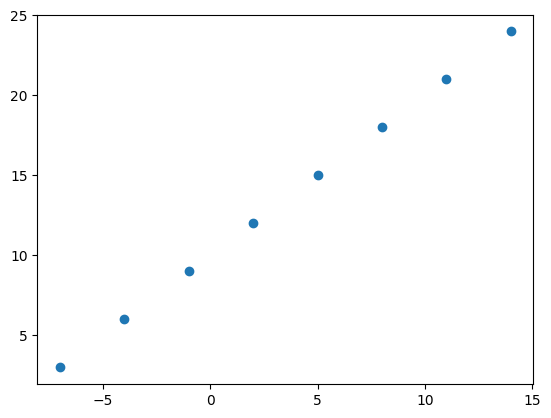

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);


In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2024-11-28 10:25:41.210012: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-11-28 10:25:41.210038: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-28 10:25:41.210045: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-28 10:25:41.210208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-28 10:25:41.210226: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0].ndim

0

In [9]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

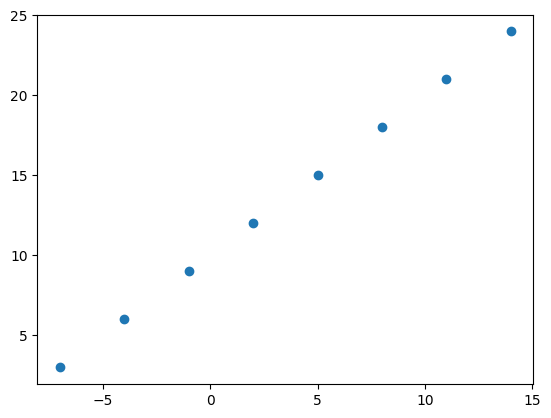

In [11]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.

2. **Compiling a model** - define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
Fitting a model - letting the model try to find patterns between X & y (features and labels).

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [12]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5


2024-11-28 10:25:41.648210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - loss: 12.9992 - mae: 12.9992
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.8667 - mae: 12.8667
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.7342 - mae: 12.7342
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.6017 - mae: 12.6017
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.4692 - mae: 12.4692


In [13]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model
c = np.array([17])
c = tf.cast(tf.constant(c), dtype = tf.float32)
c = tf.expand_dims(c, axis = 0)

y_pred = model.predict(c)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[5.4572463]], dtype=float32)

In [15]:
y_pred + 16

array([[21.457247]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 16.0646 - mae: 16.0646
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15.7833 - mae: 15.7833
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15.5021 - mae: 15.5021
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 15.2208 - mae: 15.2208
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.9447 - mae: 14.9447
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.8122 - mae: 14.8122
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 14.6797 - mae: 14.6797
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.5472 - mae: 14.5472
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.4147 - mae: 14.4147
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.2822 - mae: 14.2822
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.1497 - mae: 14.1497
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.0172 - mae: 14.0172
Epoch 13/100
1/1 ━━━━━━━

In [17]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
c

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[17.]], dtype=float32)>

In [19]:
# Let's see if our model's prediction has improved
model.predict(c)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[29.437143]], dtype=float32)

In [20]:
# Set random seed
tf.random.set_seed(42)

# Let's see if we can make another to improve our model

# 1. Create a model using the Sequential API (This time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step - loss: 13.7836 - mae: 13.7836
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.1177 - mae: 13.1177
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.4537 - mae: 12.4537
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.7893 - mae: 11.7893
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.1224 - mae: 11.1224
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 10.4510 - mae: 10.4510
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.7729 - mae: 9.7729
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.0857 - mae: 9.0857
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.3866 - mae: 8.3866
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 7.6726 - mae: 7.6726
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 6.9403 - mae: 6.9403
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.6372 - mae: 6.6372
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [21]:
# Let's see if our model's prediction has improved
model.predict(c)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[26.126318]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model  -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

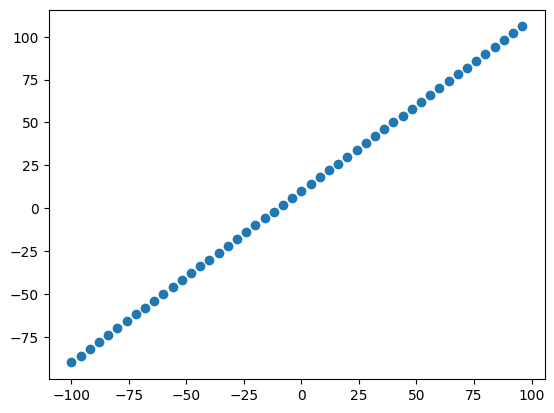

In [24]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

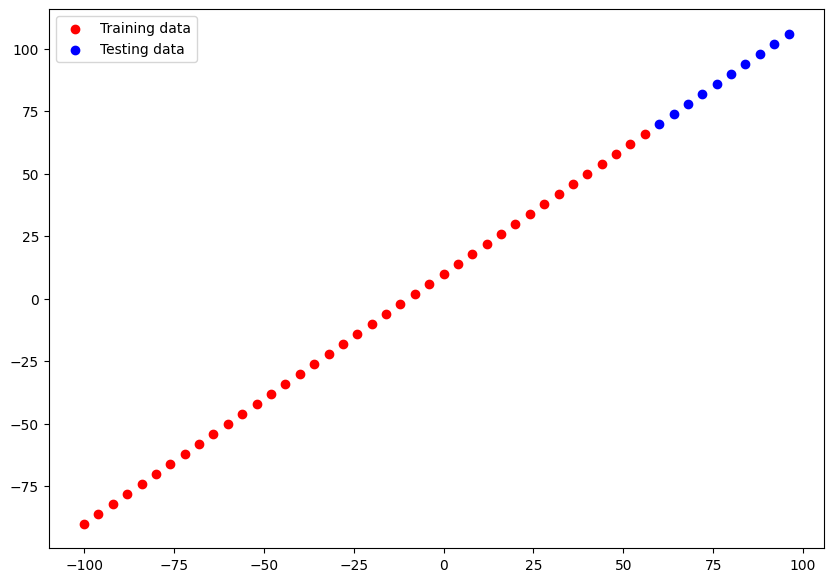

In [27]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c="r", label="Training data") # Our model will learn on this


plt.scatter(X_test, y_test, c="b", label="Testing data") # Want our model to be able to predict this (given X, what's y?)

# Show a legend
plt.legend();

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [50]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (Same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

In [51]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.

* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.

* **Non-trainable params** - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [52]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [53]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149 (600.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100 (404.00 B)

#### Visualizing a model's layers

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [55]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[ 70.27109 ],
       [ 74.291916],
       [ 78.31274 ],
       [ 82.333565],
       [ 86.35439 ],
       [ 90.37521 ],
       [ 94.39604 ],
       [ 98.41687 ],
       [102.43769 ],
       [106.45853 ]], dtype=float32)

In [56]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 Note: If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [57]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="r", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="b", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="g", label="Predictions")
  # Show the legend
  plt.legend();

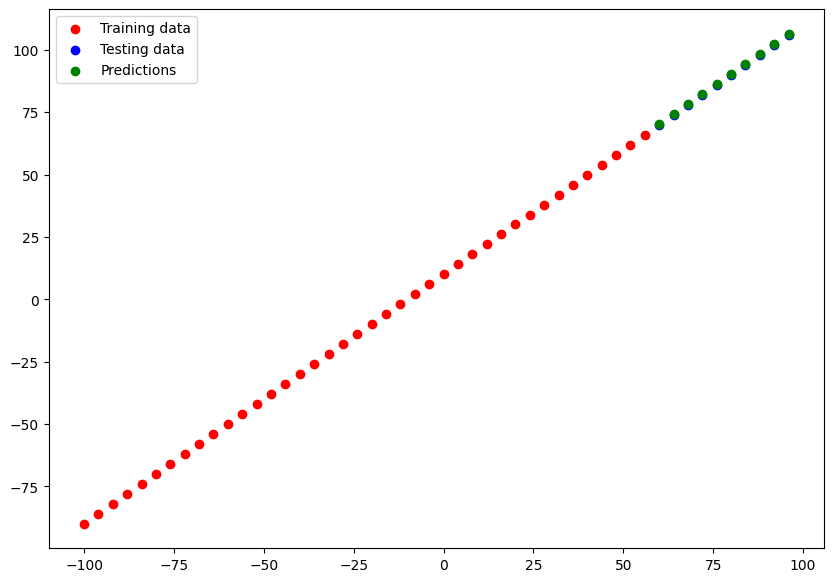

In [58]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [59]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.3648 - mae: 0.3648


[0.36480408906936646, 0.36480408906936646]

In [60]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.27109 ],
       [ 74.291916],
       [ 78.31274 ],
       [ 82.333565],
       [ 86.35439 ],
       [ 90.37521 ],
       [ 94.39604 ],
       [ 98.41687 ],
       [102.43769 ],
       [106.45853 ]], dtype=float32)>

In [61]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [62]:
mae_object = tf.keras.losses.MeanAbsoluteError()
mae = mae_object(y_test, tf.squeeze(y_pred))
mae, mae.numpy()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.3648041>, 0.3648041)

In [63]:
# Calculate the mean square error
mse_object = tf.keras.metrics.MeanSquaredError()
mse = mse_object(y_test, tf.squeeze(y_pred))
mse, mse.numpy()

(<tf.Tensor: shape=(), dtype=float32, numpy=0.13666023>, 0.13666023)

In [64]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  mae_object = tf.keras.losses.MeanAbsoluteError()
  return mae_object(y_true, tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  mse_object = tf.keras.metrics.MeanSquaredError()
  return mse_object(y_true, tf.squeeze(y_pred))

In [65]:
mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.3648041>

In [66]:
mse(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.13666023>

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - 2 Dense layer, trained for 100 epochs, Adam optimizer
2. `model_2` - 3 layers, trained for 100 epochs
3. `model_3` - 3 layers, trained for 500 epochs

**Model 1**

> 2 Dense layer, trained for 100 epochs, Adam optimizer

In [70]:
tf.random.set_seed(42)

# 1. Create a model (Same as above)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1], name="input_layer"),
    tf.keras.layers.Dense(16, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [72]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [73]:
# Make predictions for model_1
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[ 70.39513 ],
       [ 74.4231  ],
       [ 78.45108 ],
       [ 82.47906 ],
       [ 86.50703 ],
       [ 90.53501 ],
       [ 94.56299 ],
       [ 98.590965],
       [102.618935],
       [106.64692 ]], dtype=float32)

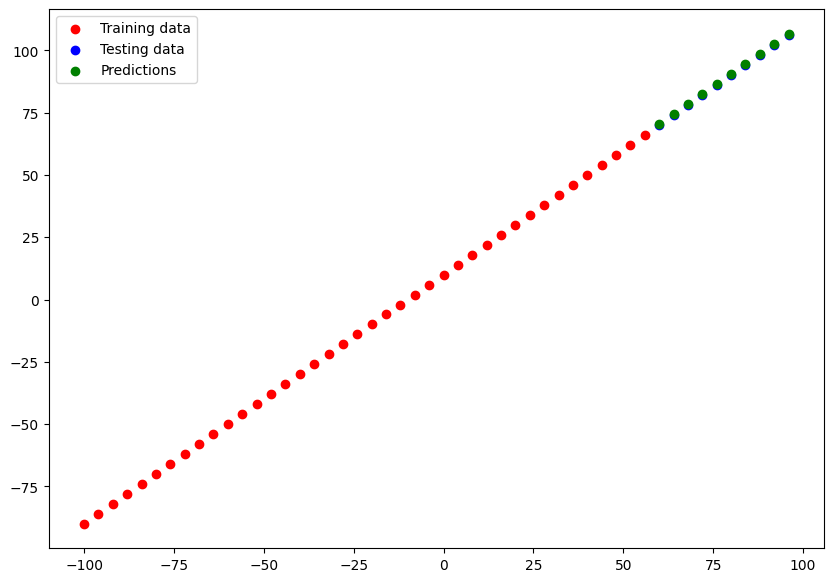

In [80]:
# Plot predictions for model_1
plot_predictions(predictions=y_pred_1)

In [83]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=0.5210213>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.27792042>)

**Model 2**

> 3 Dense layer, trained for 100 epochs, Adam optimizer

In [76]:
tf.random.set_seed(42)

# 1. Create a model (Same as above)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1], name="input_layer"),
    tf.keras.layers.Dense(16, name="hidden_layer_1"),
    tf.keras.layers.Dense(16, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [77]:
# Make predictions for model_2
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[ 70.11929 ],
       [ 74.12972 ],
       [ 78.14015 ],
       [ 82.15057 ],
       [ 86.16101 ],
       [ 90.17143 ],
       [ 94.18188 ],
       [ 98.19231 ],
       [102.20273 ],
       [106.213165]], dtype=float32)

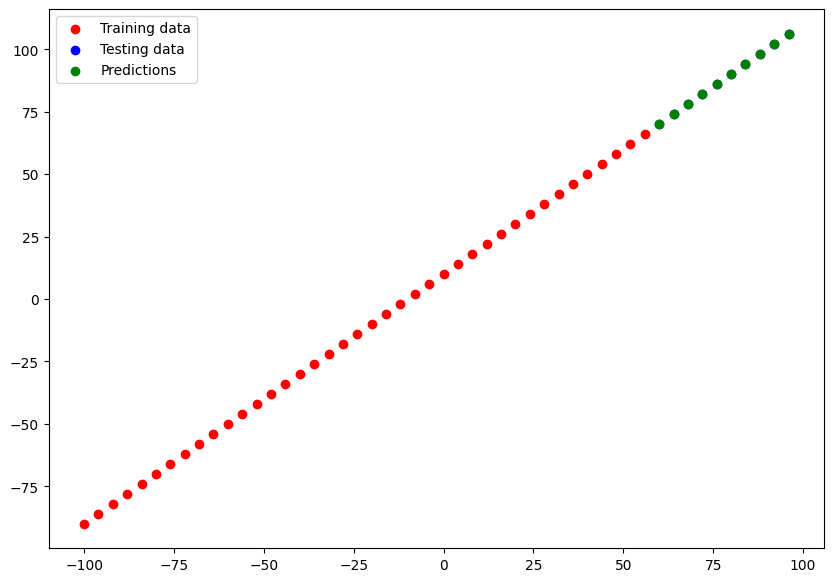

In [81]:
# Plot predictions for model_2
plot_predictions(predictions=y_pred_2)

In [85]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.1662262>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.02852867>)

**Model 3**

> 3 Dense layer, trained for 500 epochs, Adam optimizer

In [78]:
tf.random.set_seed(42)

# 1. Create a model (Same as above)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1], name="input_layer"),
    tf.keras.layers.Dense(16, name="hidden_layer_1"),
    tf.keras.layers.Dense(16, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_3")

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [79]:
# Make predictions for model_3
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[ 70.54746 ],
       [ 74.58324 ],
       [ 78.61902 ],
       [ 82.65481 ],
       [ 86.69059 ],
       [ 90.72637 ],
       [ 94.76215 ],
       [ 98.79795 ],
       [102.833725],
       [106.86951 ]], dtype=float32)

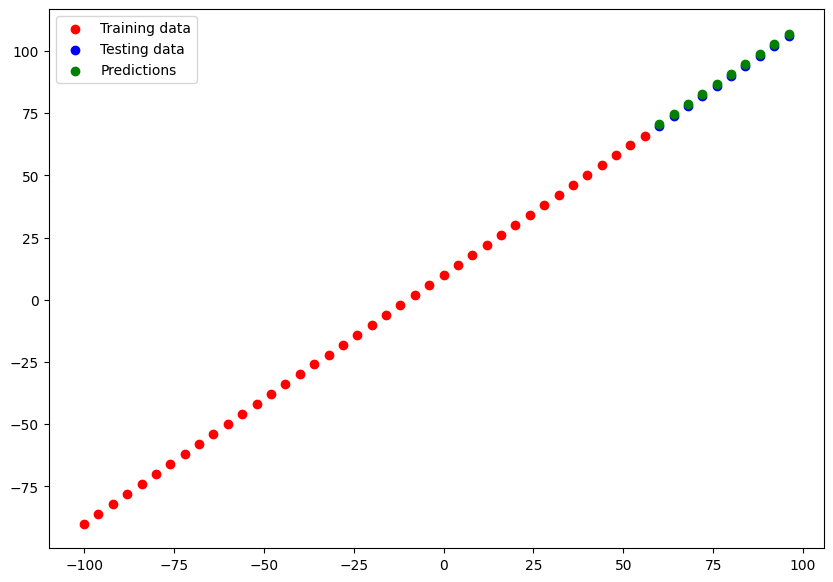

In [82]:
# Plot predictions for model_3
plot_predictions(predictions=y_pred_3)

In [94]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.7084824>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.51251113>)

🔑 Note: You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [95]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,0.521021,0.277920
1,model_2,0.166226,0.028529
2,model_3,0.708482,0.512511


Looks like model_2 performed the best...

In [89]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [109]:
# Save model using the SaveModel format
model_2.save("models/best_model_SavedModel_format.keras")

In [110]:
# Save model using the HDF5 format
model_2.save("models/best_model_HDF5_format.h5")

## Loading in a saved model

In [111]:
loaded_SavedModel_format = tf.keras.models.load_model("models/best_model_SavedModel_format.keras")
loaded_SavedModel_format.summary()

/opt/anaconda3/envs/tensorflow_venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644 (2.52 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 323 (1.27 KB)

In [112]:
model_2.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965 (3.77 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

In [113]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)

loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_SavedModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [116]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("models/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323 (1.27 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [117]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [118]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [121]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
